In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb

In [17]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.4 MB 1.7 MB/s eta 0:00:05
     - -------------------------------------- 0.3/8.4 MB 3.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/8.4 MB 4.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.8/8.4 MB 4.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 4.6 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.4 MB 4.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/8.4 MB 4.7 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/8.4 MB 4.8 MB/s eta 0:00:02
     ----------- ---------------------------- 2.3/8.4 MB 5.5 MB/s eta 0:00:02
     ------------ --------------------------- 2.6/8.4 MB 5.6 MB/s eta 0:00:02
     ------------- -------------------------- 2.8/8.4 MB 5.5 MB/s eta 0:00:02
     ------------- -------------------------- 2.8/8.4 MB 5.5 MB/s eta 0

In [19]:
# Load the Heart Disease dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names, header=None)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [20]:
# Clean the dataset
df = df.replace('?', np.nan)  # Replace missing values with NaN
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [21]:
df = df.dropna()  # Drop instances with missing values

In [22]:
df['ca'] = df['ca'].astype('float')  # Convert ca variable to type "int"
df['thal'] = df['thal'].astype('float')  # Convert thal variable to type "int"

In [23]:
df['target'] = df['target'].replace([1, 2, 3, 4], 1) # Combine all values greater than 0 into 1 (presence of heart disease)

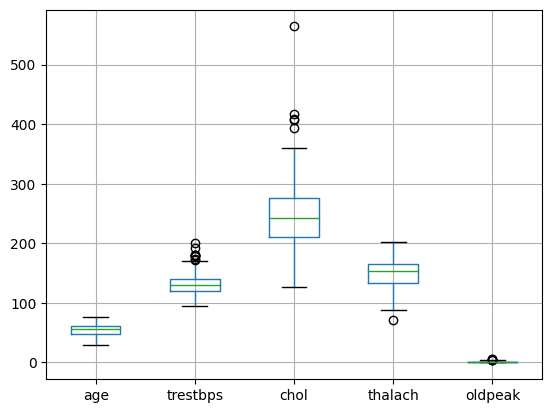

In [24]:
# Check for outliers and remove them
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continuous_vars].boxplot()
plt.show()

In [25]:
for var in continuous_vars:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    df = df[(df[var] >= low_limit) & (df[var] <= high_limit)]

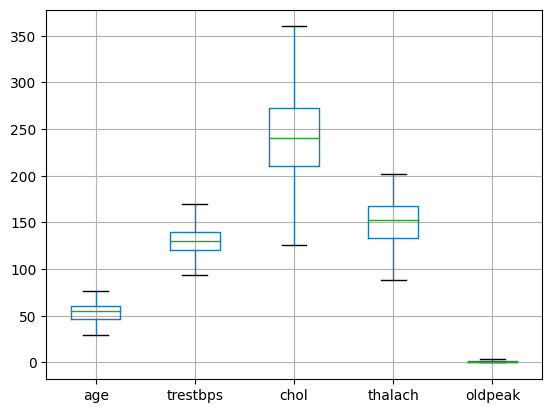

In [26]:
df[continuous_vars].boxplot()
plt.show()

In [27]:
# Formalize the dataset
X = df.values

sc = StandardScaler()  # Standardize continuous variables
X[:, [0,3,4,7,9]] = sc.fit_transform(X[:, [0,3,4,7,9]])

df_scaled = pd.DataFrame(X, columns=df.columns)

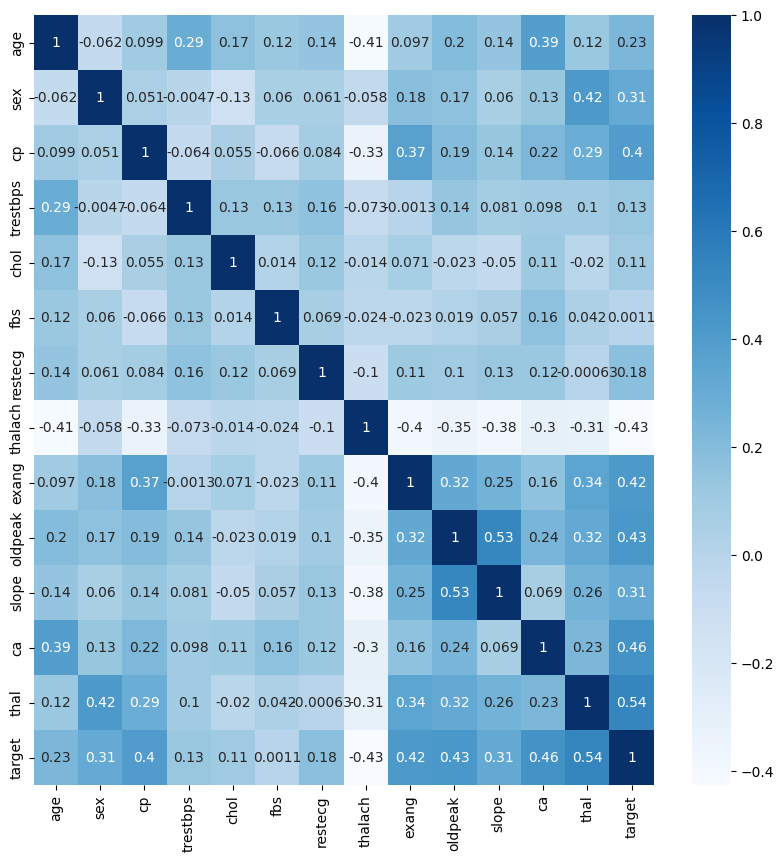

In [28]:
plt.figure(figsize = (10, 10))
corr = df_scaled.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [29]:
df_scaled.drop(columns=['fbs', 'restecg', 'chol', 'trestbps'], inplace=True)

In [30]:
df_scaled.shape

(278, 10)

In [31]:
# Formalize the dataset
X = df_scaled.iloc[:, :-1].values  # Independent variables
y = df_scaled.iloc[:, -1].values  # Dependent variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
39/39 [==============================] - 1s 3ms/step - loss: 0.6401 - accuracy: 0.6289
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7680
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7732
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7938
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7784
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7990
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8041
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7990
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8196
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8093
Epoch 11/50
39/39 [

In [35]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
y_pred_ann = model.predict(X_train)
y_pred_ann = (y_pred_ann.flatten() >= 0.5).astype(int)
print(f"ANN Testing Accuracy: {accuracy*100:.2f}%")
print("ANN Model Classification Report:")
print(classification_report(y_train, y_pred_ann))

7/7 [==============================] - 0s 2ms/step
ANN Testing Accuracy: 88.66%
ANN Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       107
         1.0       0.90      0.84      0.87        87

    accuracy                           0.89       194
   macro avg       0.89      0.88      0.88       194
weighted avg       0.89      0.89      0.89       194



In [36]:
# Define SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Testing Accuracy: {svm_acc*100:.2f}%")
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

SVM Testing Accuracy: 85.71%
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88        47
         1.0       0.88      0.78      0.83        37

    accuracy                           0.86        84
   macro avg       0.86      0.85      0.85        84
weighted avg       0.86      0.86      0.86        84



In [37]:
# Define Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Testing Accuracy: {rf_acc*100:.2f}%")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Testing Accuracy: 85.71%
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        47
         1.0       0.86      0.81      0.83        37

    accuracy                           0.86        84
   macro avg       0.86      0.85      0.85        84
weighted avg       0.86      0.86      0.86        84



In [38]:
# Define Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Testing Accuracy: {lr_acc*100:.2f}%")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

Logistic Regression Testing Accuracy: 86.90%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        47
         1.0       0.88      0.81      0.85        37

    accuracy                           0.87        84
   macro avg       0.87      0.86      0.87        84
weighted avg       0.87      0.87      0.87        84

